In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

**Задание.** Для набора данных "Структура потребления белков в Европейских странах" напишите сценарий, добавляющий в него два столбца, содержащих метки классов при иерархической кластеризации и методом _k_-средних на 3, 4, 5, 6 классов. Есть ли различия в кластеризации? Если да, то сравните координаты центроидов каждого класса. Какие выводы вы можете сделать?

In [2]:
df = pd.read_csv('Protein_Consumption_In_Europe.csv', sep=';', index_col='Country', decimal=',')


In [3]:
df.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [4]:
# Проверка на пропущенные значения
missing_values = df.isnull().sum()
print("Пропущенные значения:\n", missing_values)

Пропущенные значения:
 RedMeat      0
WhiteMeat    0
Eggs         0
Milk         0
Fish         0
Cereals      0
Starch       0
Nuts         0
Fr&Veg       0
dtype: int64


In [5]:
# Пропущенных значений нет. Круто!

In [6]:
#Нормализация
df_scaled= scaler.fit_transform(df)

In [7]:
# теперь к заданию. Делаем кластеры 2-х типов Kmean и Agglomerative

G:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


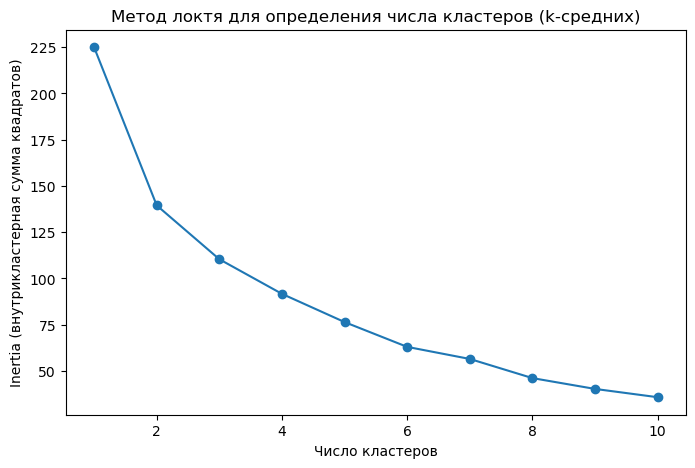

In [8]:

#  Определение числа кластеров с помощью метода локтя
inertia_values = []
possible_clusters = range(1, 11)

for n_clusters in possible_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

# Построение графика метода локтя
plt.figure(figsize=(8, 5))
plt.plot(possible_clusters,inertia_values,  marker='o')
plt.title('Метод локтя для определения числа кластеров (k-средних)')
plt.xlabel('Число кластеров')
plt.ylabel('Inertia (внутрикластерная сумма квадратов)')
plt.show()


**В целом на графике понятно что ничего не понятно, те выбрать оптимальное кол-во кластеров тяжко, но в целом от 4 до 6 можно попробовать**

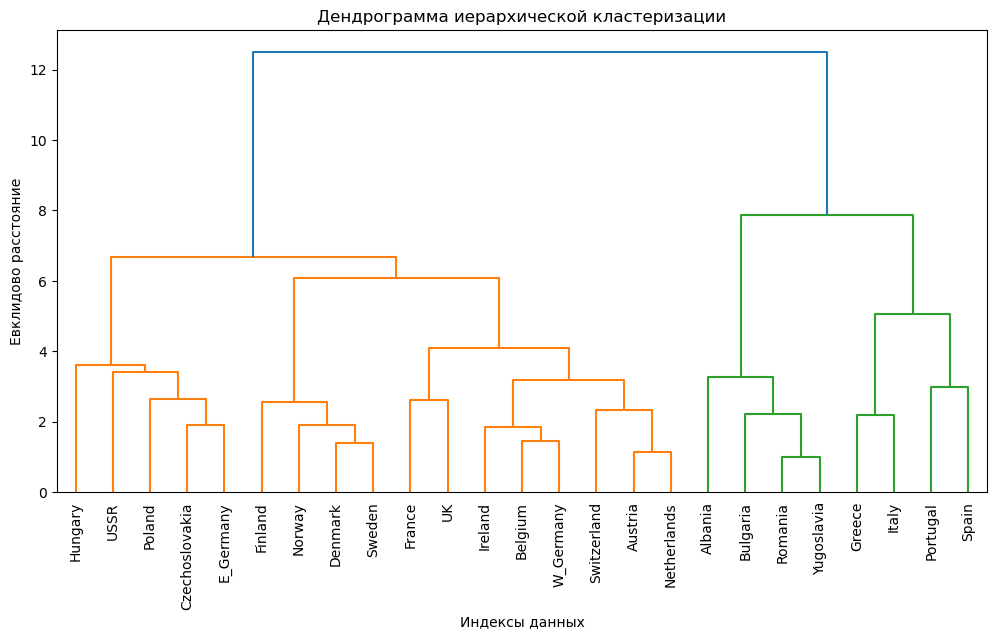

In [9]:

#  Иерархическая кластеризация
linkage_matrix = linkage(df_scaled, method='ward', metric='euclidean')

#  Построение дендрограммы
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=df.index, orientation='top', leaf_rotation=90)
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Индексы данных')
plt.ylabel('Евклидово расстояние')
plt.show()


**Тут видно что дендограма разбила на 2 кластера зеленый и оранжевый, НО видим что явно есть 5-6 кластеров** это удалите комент от меня - кароче первые 5 стран они более европейские восток типа, последние 4 уже такие южные, типа на основе этого делим кластеры

In [10]:
#Этот комент тоже удалите я поясню за дальнейшую работу, кароче тут я начиная с 2 заканчивая 6 
#кластерами буду проверять отдельно все, но можете пропустить их и сказать что круче всего результат на 5-6 кластерах 
# и перейти к ним, они самые нижние там

# НО

**Я сделал пример с описание для 5 кластеров прочтите** а уже с 2-6 остальные сами спокойно опишите сложного ничего нет по аналогии кароче

In [11]:
df.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [12]:
# Выбираем оптимальное количество кластеров (например, 4)
optimal_clusters = 2


In [13]:
# Создаем копии оригинального датафрейма
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()
df5 = df.copy()
df6 = df.copy()

# **Для 2 кластеров**

In [14]:
# Для 2
# Оптимальное количество кластеров
optimal_clusters = 2

# KMeans
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df2['kmeans_labels'] = kmeans.fit_predict(df_scaled)

# AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
df2['agg_labels'] = agg_clustering.fit_predict(df_scaled)

In [15]:
df2.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,kmeans_labels,agg_labels
Country,,,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,1,0
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,0,1
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,0,1
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,1,0
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,0,1


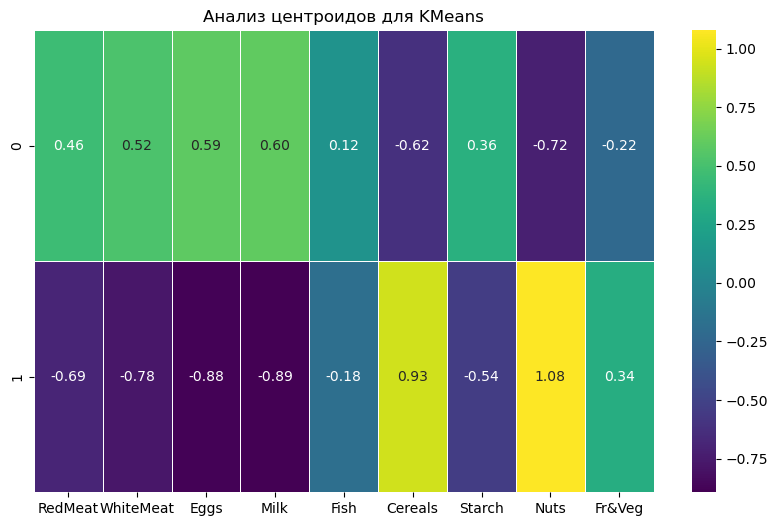

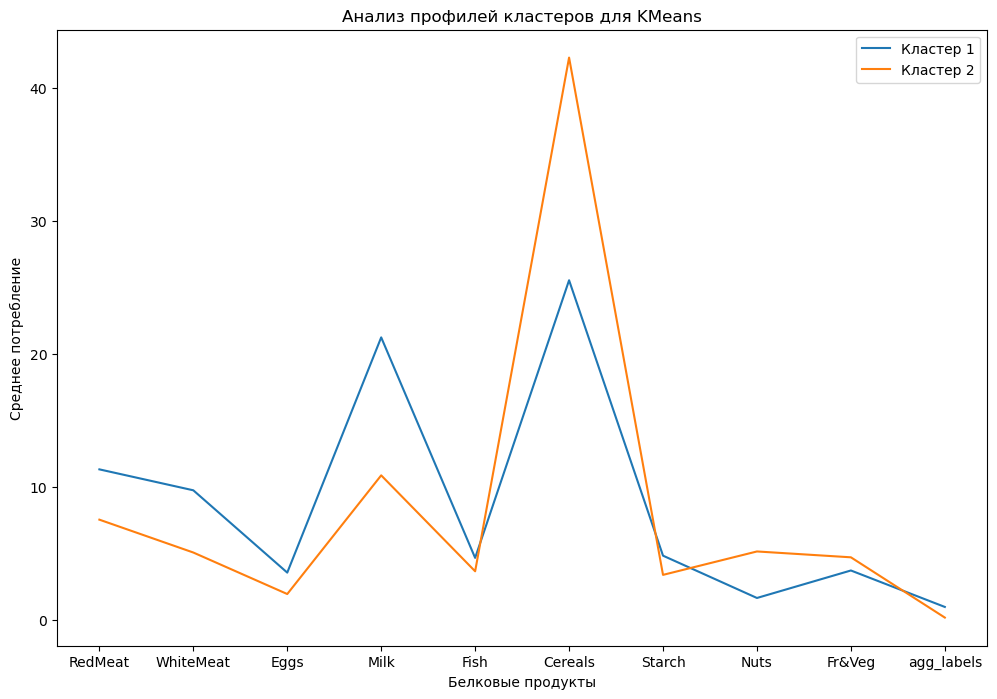

In [16]:
# Анализ центроидов для KMeans
kmeans_centroids = kmeans.cluster_centers_
df_kmeans_centroids = pd.DataFrame(kmeans_centroids, columns=df.columns)

plt.figure(figsize=(10, 6))
sns.heatmap(df_kmeans_centroids, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Анализ центроидов для KMeans')
plt.show()

# Анализ профилей кластеров
df_cluster_profiles = df2.groupby('kmeans_labels').mean()

# Визуализация профилей кластеров
plt.figure(figsize=(12, 8))
for label in range(optimal_clusters):
    plt.plot(df_cluster_profiles.columns, df_cluster_profiles.loc[label], label=f'Кластер {label + 1}')

plt.title('Анализ профилей кластеров для KMeans')
plt.xlabel('Белковые продукты')
plt.ylabel('Среднее потребление')
plt.legend()
plt.show()

In [17]:
# Для 2
# Оптимальное количество кластеров
optimal_clusters_2 = 2

# KMeans
kmeans = KMeans(n_clusters=optimal_clusters_2, random_state=42)
df2['kmeans_labels'] = kmeans.fit_predict(df_scaled)

# AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters_2)
df2['agg_labels'] = agg_clustering.fit_predict(df_scaled)

In [18]:
# Создание словаря с именами кластеров
cluster_names_k = {
    0: 'Высокое потребление белковых продуктов',
    1: 'Высокое портребление орехов и хлопьев',
    # Добавьте другие кластеры при необходимости
}

cluster_names_a = {
    1: 'Высокое потребление белковых продуктов',
    0: 'Высокое портребление орехов и хлопьев',
    # Добавьте другие кластеры при необходимости
}

# Замена числовых меток на имена в столбцах 'kmeans_labels' и 'agg_labels'
df2['kmeans_labels'] = df2['kmeans_labels'].map(cluster_names_k)
df2['agg_labels'] = df2['agg_labels'].map(cluster_names_a)




In [19]:
df2

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,kmeans_labels,agg_labels
Country,,,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,Высокое портребление орехов и хлопьев,Высокое портребление орехов и хлопьев
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,Высокое потребление белковых продуктов,Высокое потребление белковых продуктов
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,Высокое потребление белковых продуктов,Высокое потребление белковых продуктов
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,Высокое портребление орехов и хлопьев,Высокое портребление орехов и хлопьев
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,Высокое потребление белковых продуктов,Высокое потребление белковых продуктов
Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4,Высокое потребление белковых продуктов,Высокое потребление белковых продуктов
E_Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6,Высокое потребление белковых продуктов,Высокое потребление белковых продуктов
Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4,Высокое потребление белковых продуктов,Высокое потребление белковых продуктов
France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5,Высокое потребление белковых продуктов,Высокое потребление белковых продуктов


# **Для 3 кластеров**

In [20]:
# Для 3
# Оптимальное количество кластеров
optimal_clusters_3 = 3

# KMeans
kmeans = KMeans(n_clusters=optimal_clusters_3, random_state=42)
df3['kmeans_labels'] = kmeans.fit_predict(df_scaled)

# AgglomerativeClustering
agg_clustering_clustering = AgglomerativeClustering(n_clusters=optimal_clusters_3)
df3['agg_labels'] = agg_clustering.fit_predict(df_scaled)

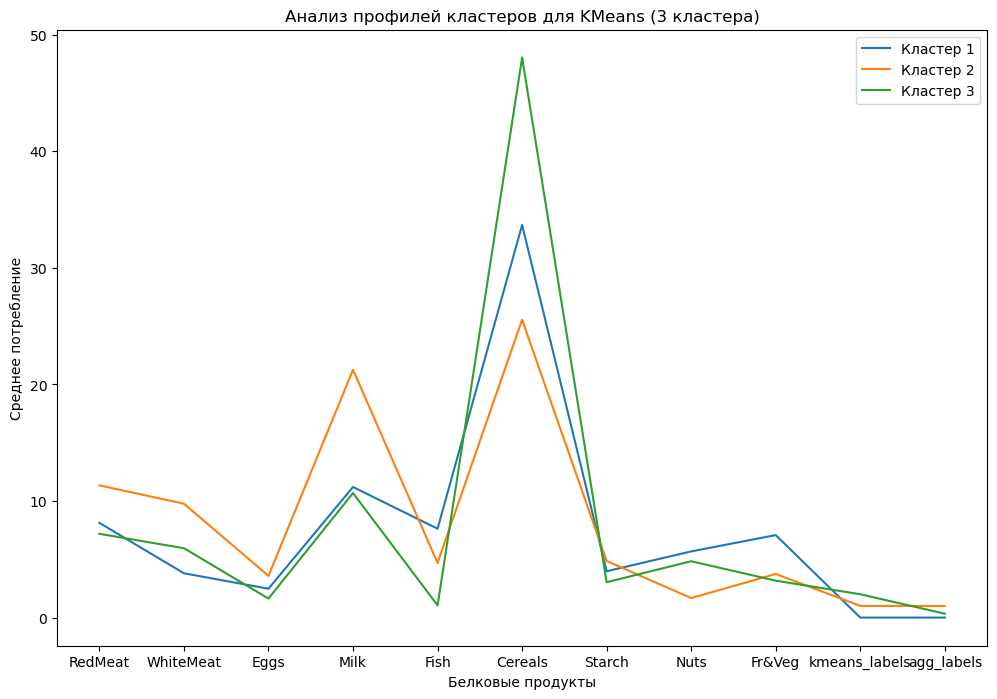

In [21]:
# KMeans с тремя кластерами
kmeans_3 = KMeans(n_clusters=optimal_clusters_3, random_state=42)
df3['kmeans_labels_3'] = kmeans_3.fit_predict(df_scaled)

# Анализ профилей кластеров для KMeans с тремя кластерами
df_cluster_profiles_3 = df3.groupby('kmeans_labels_3').mean()

# Визуализация профилей кластеров
plt.figure(figsize=(12, 8))
for label in range(optimal_clusters_3):
    plt.plot(df_cluster_profiles_3.columns, df_cluster_profiles_3.loc[label], label=f'Кластер {label + 1}')

plt.title('Анализ профилей кластеров для KMeans (3 кластера)')
plt.xlabel('Белковые продукты')
plt.ylabel('Среднее потребление')
plt.legend()
plt.show()

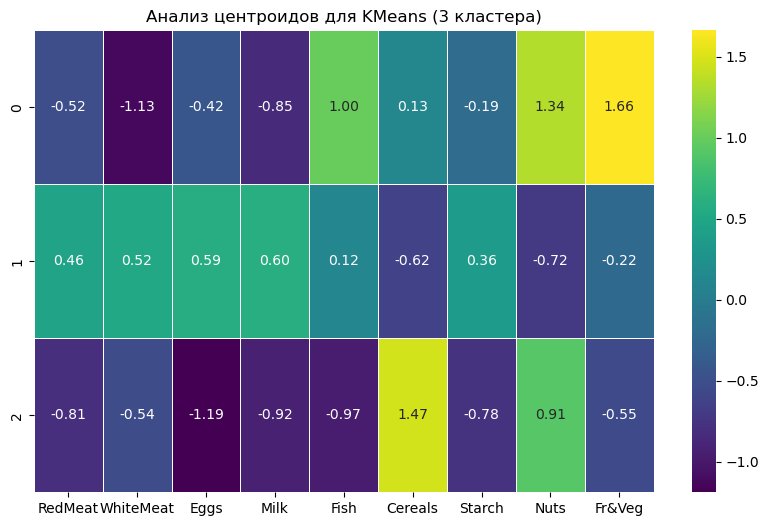

In [22]:
# Анализ центроидов для KMeans с тремя кластерами
kmeans_centroids_3 = kmeans_3.cluster_centers_
df_kmeans_centroids_3 = pd.DataFrame(kmeans_centroids_3, columns=df.columns)

# Визуализация центроидов
plt.figure(figsize=(10, 6))
sns.heatmap(df_kmeans_centroids_3, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Анализ центроидов для KMeans (3 кластера)')
plt.show()


In [23]:
# Удаление последнего столбца 'kmeans_labels_3'
df3 = df3.drop(columns='kmeans_labels_3')


In [24]:
# Создание словаря с именами кластеров
cluster_names_k = {
    0: 'Овощи, орехи, рыба',
    1: 'Высокое потребление белковых продуктов',
    2: 'Хлопья и орехи'
    # Добавьте другие кластеры при необходимости
}

cluster_names_a = {
    1: 'Высокое потребление белковых продуктов',
    0: 'Хлопья и орехи',
    2: 'Овощи, орехи, рыба'
    # Добавьте другие кластеры при необходимости
}

# Замена числовых меток на имена в столбцах 'kmeans_labels' и 'agg_labels'
df3['kmeans_labels'] = df3['kmeans_labels'].map(cluster_names_k)
df3['agg_labels'] = df3['agg_labels'].map(cluster_names_a)


# **Для 4 кластеров**

In [25]:
# Оптимальное количество кластеров
optimal_clusters_4 = 4

# KMeans
kmeans = KMeans(n_clusters=optimal_clusters_4, random_state=42)
df4['kmeans_labels'] = kmeans.fit_predict(df_scaled)

# AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
df4['agg_labels'] = agg_clustering.fit_predict(df_scaled)


In [26]:
print("Метки кластеров (KMeans):\n", df4['kmeans_labels'].value_counts())
print("Метки кластеров (Agg):\n", df4['agg_labels'].value_counts())

Метки кластеров (KMeans):
 0    12
1     5
2     4
3     4
Name: kmeans_labels, dtype: int64
Метки кластеров (Agg):
 0    12
3     5
2     4
1     4
Name: agg_labels, dtype: int64


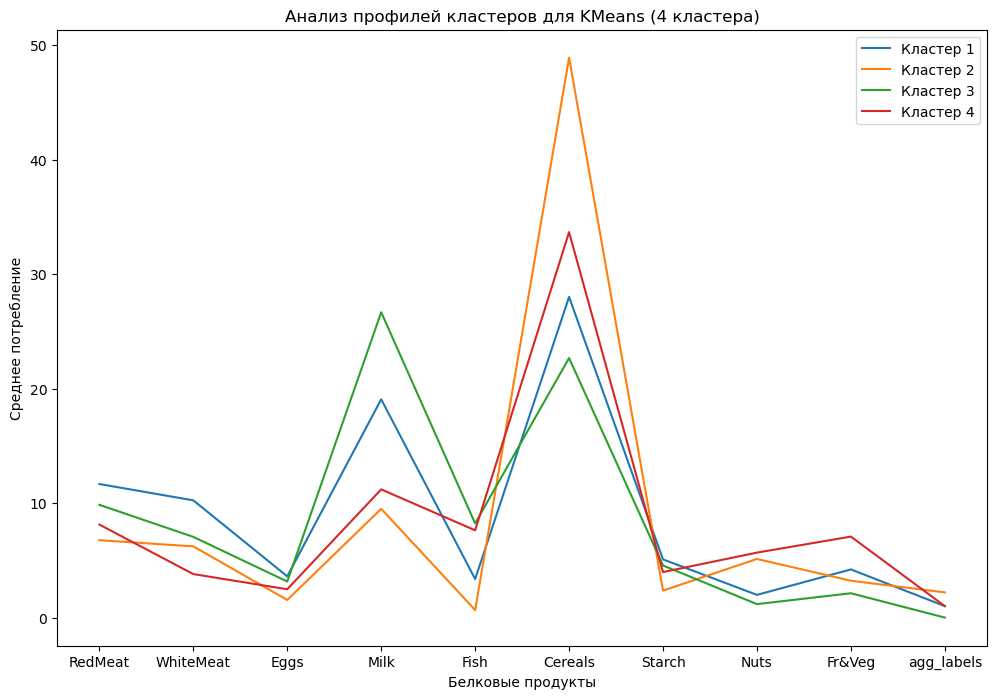

In [27]:
# Анализ профилей кластеров для KMeans с тремя кластерами
df_cluster_profiles_4 = df4.groupby('kmeans_labels').mean()

# Визуализация профилей кластеров
plt.figure(figsize=(12, 8))
for label in range(optimal_clusters_4):
    plt.plot(df_cluster_profiles_4.columns, df_cluster_profiles_4.loc[label], label=f'Кластер {label + 1}')

plt.title('Анализ профилей кластеров для KMeans (4 кластера)')
plt.xlabel('Белковые продукты')
plt.ylabel('Среднее потребление')
plt.legend()
plt.show()



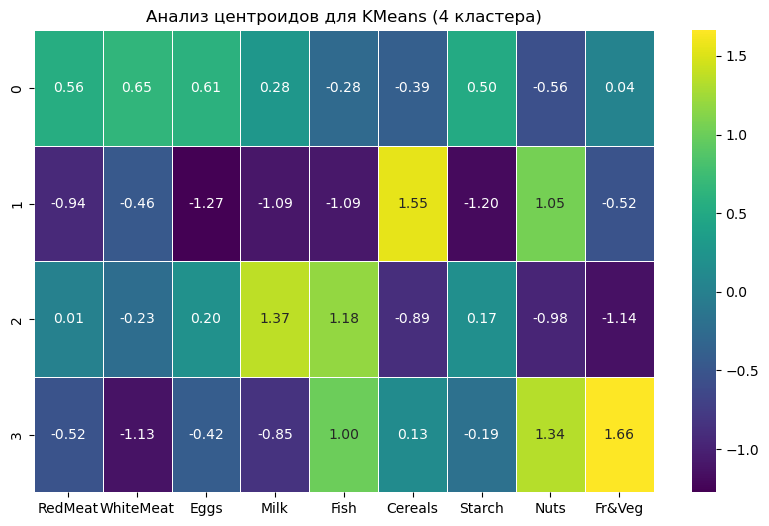

In [28]:
# Анализ центроидов для KMeans с тремя кластерами
kmeans_centroids_4 = kmeans.cluster_centers_
df_kmeans_centroids_4 = pd.DataFrame(kmeans_centroids_4, columns=df.columns)

# Визуализация центроидов
plt.figure(figsize=(10, 6))
sns.heatmap(df_kmeans_centroids_4, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Анализ центроидов для KMeans (4 кластера)')
plt.show()


In [29]:
# Создание словаря с именами кластеров
cluster_names_k = {
    0: 'Белое мясо и яица',
    1: 'Хлопья и орехи',
    2: 'Молоко и рыба',
    3: 'Рыба, орехи и свежие овощи&фрукты',
    # Добавьте другие кластеры при необходимости
}

cluster_names_a = {
    0: 'Белое мясо и яица',
    1: 'Хлопья и орехи',
    2: 'Молоко и рыба',
    3: 'Рыба, орехи и свежие овощи&фрукты',
    # Добавьте другие кластеры при необходимости
}


# Замена числовых меток на имена в столбцах 'kmeans_labels' и 'agg_labels'
df4['kmeans_labels'] = df4['kmeans_labels'].map(cluster_names_k)
df4['agg_labels'] = df4['agg_labels'].map(cluster_names_a)


# **Для 5 кластеров**

In [30]:
# Оптимальное количество кластеров
optimal_clusters_5 = 5

# KMeans
kmeans = KMeans(n_clusters=optimal_clusters_5, random_state=42)
df5['kmeans_labels'] = kmeans.fit_predict(df_scaled)

# AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
df5['agg_labels'] = agg_clustering.fit_predict(df_scaled)


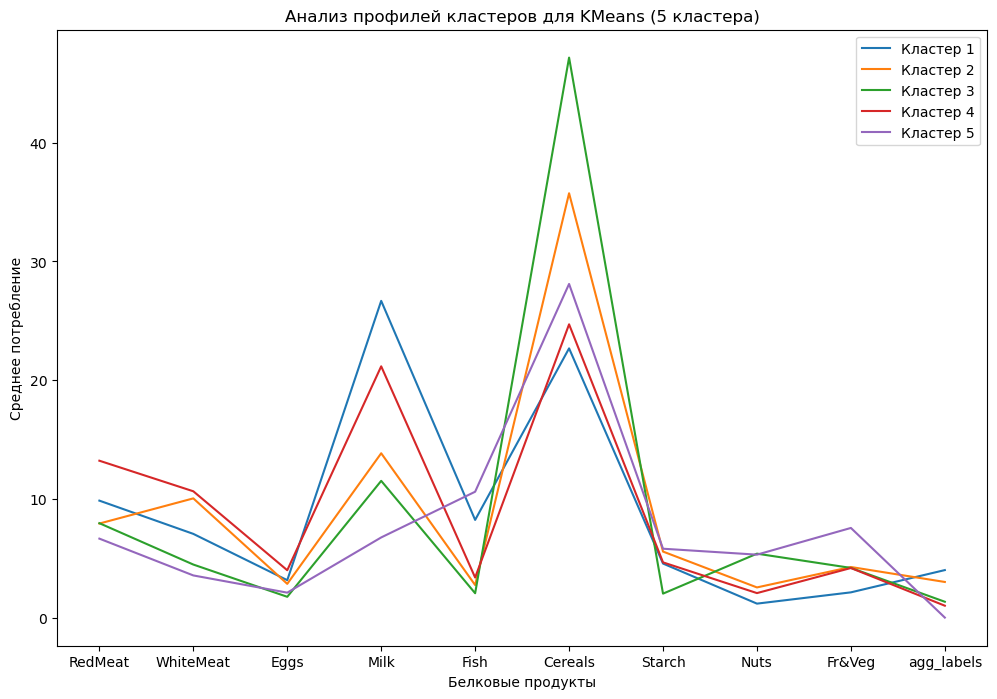

In [31]:
# Анализ профилей кластеров для KMeans с тремя кластерами
df_cluster_profiles_5 = df5.groupby('kmeans_labels').mean()

# Визуализация профилей кластеров
plt.figure(figsize=(12, 8))
for label in range(optimal_clusters_5):
    plt.plot(df_cluster_profiles_5.columns, df_cluster_profiles_5.loc[label], label=f'Кластер {label + 1}')

plt.title('Анализ профилей кластеров для KMeans (5 кластера)')
plt.xlabel('Белковые продукты')
plt.ylabel('Среднее потребление')
plt.legend()
plt.show()


**Кароче это профиль кластеров показывает что чаще всего хавает страна** типа видно что больше всего например в 1 кластере молока и cereals(типа углеводы - хлопья и тд) - в принципе логично что молоко и хлопья норм

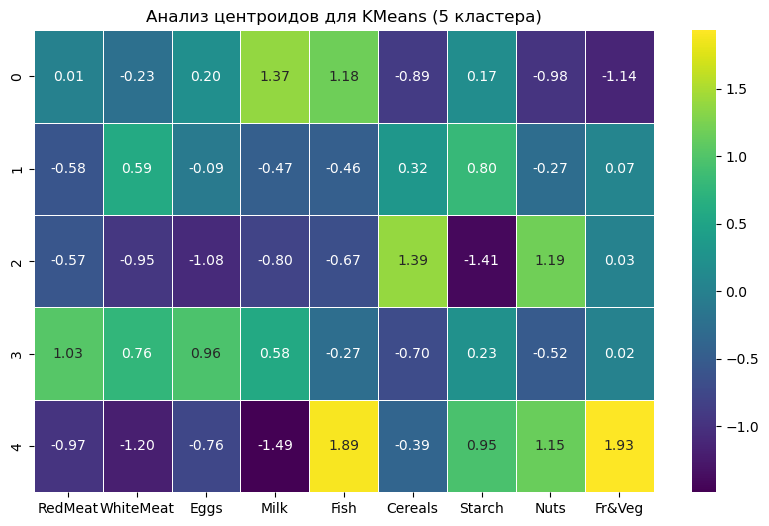

In [32]:
# Анализ центроидов для KMeans с тремя кластерами
kmeans_centroids_4 = kmeans.cluster_centers_
df_kmeans_centroids_4 = pd.DataFrame(kmeans_centroids_4, columns=df.columns)

# Визуализация центроидов
plt.figure(figsize=(10, 6))
sns.heatmap(df_kmeans_centroids_4, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Анализ центроидов для KMeans (5 кластера)')
plt.show()

**Это тепловая карта центройдов** - желтые самые яркие это то чего больше и соответственно темные чего меньше. Суть в чем например в 0 кластере он же 1 (типа в програмирование все с 0) видно что больше всего молоко и рыба, не совсем понятно что за страны и дета, но например в 3 кластере видно что это красное, белое мясо, яица и немного молока - те это страна где белковая диета, наверно северная типа такого. и в 4 там рыба, starch хз что это но что-то южное, орехи и Fr&Veg - фрукты и овощи, типа это южные страны - тут диета на морепродуктах и фруктах с овощями, по аналогии описывайте остальные кластеры и разные варианты начиная от 2 заканчивая 6

In [33]:
# Создание словаря с именами кластеров
cluster_names_k = {
    0: 'Молоко и рыба',
    1: 'Крахмал и белое мясо',
    2: 'Орехи и хлопья',
    3: 'Красное мясо, белое мясо и яица',
    4: 'Рыба, орехи, крахмал и овощи&фрукты',
    # Добавьте другие кластеры при необходимости
}

cluster_names_a = {
    0: 'Молоко и рыба',
    1: 'Крахмал и белое мясо',
    2: 'Орехи и хлопья',
    3: 'Красное мясо, белое мясо и яица',
    4: 'Рыба, орехи, крахмал и овощи&фрукты',
    # Добавьте другие кластеры при необходимости
}


# Замена числовых меток на имена в столбцах 'kmeans_labels' и 'agg_labels'
df5['kmeans_labels'] = df5['kmeans_labels'].map(cluster_names_k)
df5['agg_labels'] = df5['agg_labels'].map(cluster_names_a)


# **Для 6 кластеров**

In [34]:
# Оптимальное количество кластеров
optimal_clusters_6 = 6

# KMeans
kmeans = KMeans(n_clusters=optimal_clusters_6, random_state=42)
df6['kmeans_labels'] = kmeans.fit_predict(df_scaled)

# AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=6)
df6['agg_labels'] = agg_clustering.fit_predict(df_scaled)


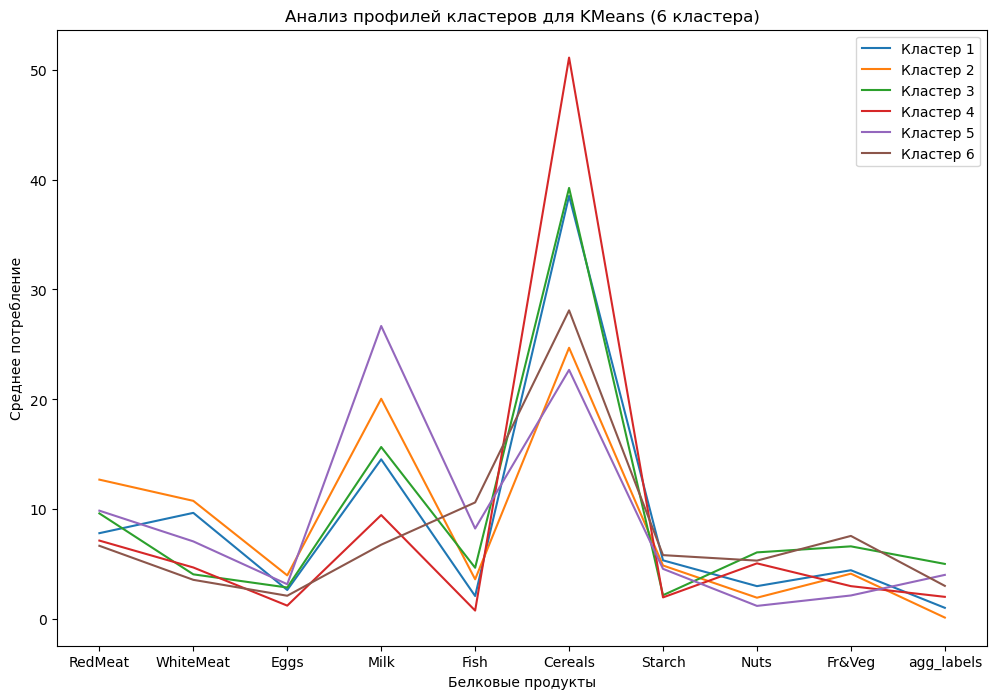

In [35]:
# Анализ профилей кластеров для KMeans с тремя кластерами
df_cluster_profiles_6 = df6.groupby('kmeans_labels').mean()

# Визуализация профилей кластеров
plt.figure(figsize=(12, 8))
for label in range(optimal_clusters_6):
    plt.plot(df_cluster_profiles_6.columns, df_cluster_profiles_6.loc[label], label=f'Кластер {label + 1}')

plt.title('Анализ профилей кластеров для KMeans (6 кластера)')
plt.xlabel('Белковые продукты')
plt.ylabel('Среднее потребление')
plt.legend()
plt.show()


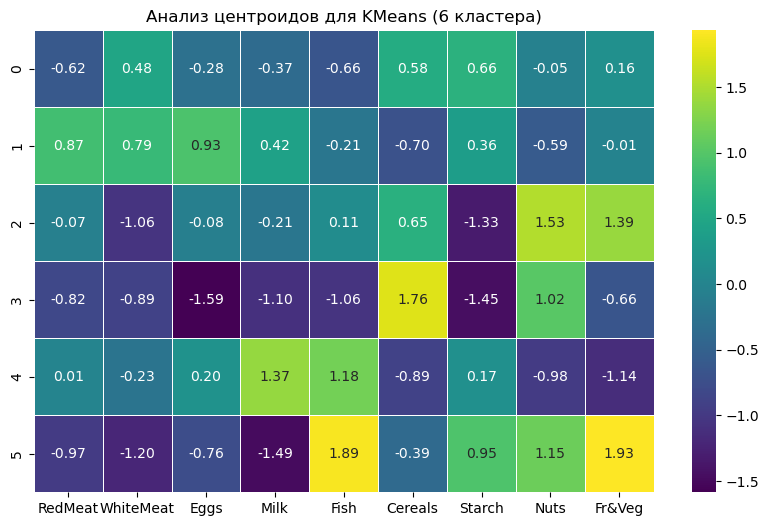

In [36]:
# Анализ центроидов для KMeans с тремя кластерами
kmeans_centroids_6 = kmeans.cluster_centers_
df_kmeans_centroids_6 = pd.DataFrame(kmeans_centroids_6, columns=df.columns)

# Визуализация центроидов
plt.figure(figsize=(10, 6))
sns.heatmap(df_kmeans_centroids_6, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Анализ центроидов для KMeans (6 кластера)')
plt.show()


In [37]:
# Создание словаря с именами кластеров
cluster_names_k = {
    0: 'Крахмал и хлопья',
    1: 'Красное и белое мясо, яица',
    2: 'Орехи и фрукты&овощи',
    3: 'Хлопья и орехи',
    4: 'Молоко и рыба',
    5: 'Рыба, крахмал, орехи и овощи&фрукты',
    # Добавьте другие кластеры при необходимости
}

cluster_names_a = {
    0: 'Крахмал и хлопья',
    1: 'Красное и белое мясо, яица',
    2: 'Орехи и фрукты&овощи',
    3: 'Хлопья и орехи',
    4: 'Молоко и рыба',
    5: 'Рыба, крахмал, орехи и овощи&фрукты',
    # Добавьте другие кластеры при необходимости
}



# Замена числовых меток на имена в столбцах 'kmeans_labels' и 'agg_labels'
df6['kmeans_labels'] = df6['kmeans_labels'].map(cluster_names_k)
df6['agg_labels'] = df6['agg_labels'].map(cluster_names_a)

# Вывод

**Оптимальное количество кластеров по моему предположуению будет 4-5** - почему? На них более точно видны типы диет каждой страны от их климата или других обстоятельств. Таким образом при разбиение на 5 кластеров видно что у **0** это диета на рыбе и молоке, **1** это белое мясо и углеводы, **2** это углеводная диета, **3** белковая диет, **4** южная диета 